In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from joblib import Parallel, delayed
from itertools import product

import sys
sys.path.append('/home/yuncong/Brain/pipeline_scripts')
from utilities2014 import *
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dm = DataManager(generate_hierarchy=False, stack='RS141', resol='x5', section=17)
dm._load_image()

In [6]:
textonmap = dm.load_pipeline_result('texMap', 'npy')
textonmap_viz = dm.load_pipeline_result('texMap', 'png')
n_texton = len(np.unique(textonmap)) - 1

image = dm.image_rgb
mask = dm.mask

height, width = image.shape[:2]

In [7]:
n_theta = 12
theta_binwidth = 2*np.pi/n_theta

radius = 100
radius2 = radius**2

thetas = np.linspace(2*np.pi, n_theta)

In [8]:
box_indices = np.dstack(np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))).astype(np.int16)
circle_indices = box_indices[np.linalg.norm(box_indices, axis=-1) <= radius]
angles = np.arctan2(circle_indices[:,0], circle_indices[:,1])
angles[angles < 0] += 2*np.pi
angular_bins = np.int0(angles/theta_binwidth)
pie_indices = [circle_indices[angular_bins==k] for k in range(n_theta)]

# centers = np.dstack(np.meshgrid(np.arange(height), np.arange(width))).astype(np.int16)

In [8]:
# from itertools import groupby, chain
# from operator import itemgetter
# from collections import Counter

In [9]:
# # theta = 0
# # start_bin = int(theta / theta_binwidth)

# first_half_discs = []
# second_half_discs = []

# for start_bin in range(n_theta):

#     first_half_bins = np.arange(start_bin, start_bin+n_theta/2)%n_theta
#     second_half_bins = np.arange(start_bin+n_theta/2, start_bin+n_theta)%n_theta

#     first_half_disc = np.vstack([pie_indices[k] for k in first_half_bins])
#     second_half_disc = np.vstack([pie_indices[k] for k in second_half_bins])
   
#     first_half_discs.append(first_half_disc)
#     second_half_discs.append(second_half_disc)

In [8]:
# new_indices_shift_right = []
# new_indices_shift_left = []
# new_indices_shift_down = []
# new_indices_shift_up = []

# for s in range(n_theta):

#     fixed = set(map(tuple, pie_indices[s]))
#     shifted_right = set(map(tuple, pie_indices[s]+[0,1]))
#     shifted_left = set(map(tuple, pie_indices[s]+[0,-1]))
#     shifted_up = set(map(tuple, pie_indices[s]+[-1,0]))
#     shifted_down = set(map(tuple, pie_indices[s]+[1,0]))

#     add_right = np.array(list(shifted_right - fixed))
#     add_left = np.array(list(shifted_left - fixed))
#     add_down = np.array(list(shifted_down - fixed))
#     add_up = np.array(list(shifted_up - fixed))
    
#     new_indices_shift_right.append(add_right)
#     new_indices_shift_left.append(add_left)
#     new_indices_shift_down.append(add_down)
#     new_indices_shift_up.append(add_up)

In [ ]:
from tables import *
filters = Filters(complevel=9, complib='blosc')

In [9]:
# def dump_array(list_of_pts, name):
#     with open_file('/home/yuncong/csd395/%s'%name, mode="w") as f:
#         for s, pts in enumerate(list_of_pts):
#             print s
#             shifted_pts = (centers[:,:,None] + pts).astype(np.int16)
#             shifted_pts = [[a[(a[:,0]>=0)&(a[:,0]<height)&(a[:,1]>=0)&(a[:,1]<width)] 
#                        for a in b] for b in shifted_pts]
#             t = f.create_vlarray('/', 'orientation%d'%s, Int16Atom(shape=(2,)), filters=filters)
#             for y,x in product(range(height), range(width)):
#                 t.append(shifted_pts[y][x])

In [10]:
# def dump_each_array(pts, name, s):
#     with open_file('/home/yuncong/csd395/%s_%d'%(name, s), mode="w") as f:
#         shifted_pts = centers[:,:,None] + pts
#         shifted_pts = [[a[(a[:,0]>=0)&(a[:,0]<height)&(a[:,1]>=0)&(a[:,1]<width)] 
#                         for a in b] for b in shifted_pts]
#         t = f.create_vlarray('/', 'data', Int16Atom(shape=(2,)), filters=filters)
#         for y,x in product(range(height), range(width)):
#             t.append(shifted_pts[y][x])

In [11]:
# def dump_array_separate(list_of_pts, name):
#     for s in range(len(list_of_pts)):
#         with open_file('/home/yuncong/csd395/%s_%d'%(name, s), mode="w") as f:
#             shifted_pts = centers[:,:,None] + list_of_pts[s]
#             shifted_pts = [[a[(a[:,0]>=0)&(a[:,0]<height)&(a[:,1]>=0)&(a[:,1]<width)] 
#                             for a in b] for b in shifted_pts]
#             t = f.create_vlarray('/', 'data', Int16Atom(shape=(2,)), filters=filters)
#             for y,x in product(range(height), range(width)):
#                 t.append(shifted_pts[y][x])

In [ ]:
# # Parallel(n_jobs=16, max_nbytes=1e6)(delayed(dump_each_array)(pie_indices[s], 'pie_indices', s) for s in range(n_theta))

# for s in range(n_theta):
#     dump_each_array(pie_indices[s], 'pie_indices', s)

In [ ]:
# dump_array_separate(pie_indices, 'pie_indices')

In [29]:
# all_shift_right_indices = [centers[:,:,None] + new_indices_shift_right[s] for s in range(n_theta)]
# all_shift_left_indices = [centers[:,:,None] + new_indices_shift_left[s] for s in range(n_theta)]
# all_shift_down_indices = [centers[:,:,None] + new_indices_shift_down[s] for s in range(n_theta)]
# all_shift_up_indices = [centers[:,:,None] + new_indices_shift_up[s] for s in range(n_theta)]

In [ ]:
# dump_array(new_indices_shift_right, 'new_indices_shift_right')
# dump_array(new_indices_shift_left, 'new_indices_shift_left')
# dump_array(new_indices_shift_up, 'new_indices_shift_up')
# dump_array(new_indices_shift_down, 'new_indices_shift_down')

In [ ]:
# def compute_pie_histogram_cached(s, mask):
#     Hs = np.zeros((height, width, n_texton), np.int16)

#     with open_file('/home/yuncong/csd395/shifted_pts_%d'%s, mode="r") as f:
#         all_pie_indices_s = f.get_node('/orientation%d'%s).read()
#     all_pie_indices_s = np.array(all_pie_indices_s).reshape((height,width,))
    
#     mys, mxs = np.where(mask)
#     for yc,xc in zip(mys, mxs):
#         Hs[yc, xc], _ = np.histogram(textonmap[all_pie_indices_s[yc,xc][:,0], all_pie_indices_s[yc,xc][:,1]], 
#                                      bins=range(n_texton+1))
        
#     return Hs

In [17]:
def compute_pie_histogram(textonmap, pie_indices_s, mys, mxs,
                          radius, 
                          height, 
                          width):
    Hs = np.zeros((height, width, n_texton), np.int16)

    for yc,xc in zip(mys, mxs):
#         qq = time.time()
        ys = pie_indices_s[:,0] + yc
        xs = pie_indices_s[:,1] + xc
        if yc < radius or yc > height - radius or xc < radius or xc > width - radius:
            sel = (ys>=0)&(ys<height)&(xs>=0)&(xs<width)
            pie_indices_s = pie_indices_s[sel]
            xs = xs[sel]
            ys = ys[sel]
        
#         w = Counter(textonmap[ys, xs])
#         Hs[yc, xc] = [w[i] for i in range(n_texton)]      
        Hs[yc, xc], _ = np.histogram(textonmap[ys, xs], bins=range(n_texton+1))
#         print time.time() - qq
    return Hs

In [9]:
import compute_pie

In [ ]:
qq = time.time()

mys, mxs = np.where(mask)
mys = mys.astype(np.int16)
mxs = mxs.astype(np.int16)

H = Parallel(n_jobs=16)(delayed(compute_pie.compute_pie_histogram)(textonmap, pie_indices[s], 
                                                                   mys, mxs, radius, height, width, n_texton) 
                        for s in range(n_theta))

H = np.asarray(H)

print time.time() - qq

In [8]:
with open_file('/home/yuncong/csd395/H', mode="w") as f:
    t = f.create_carray('/', 'data', Int64Atom(), filters=filters, obj=H)

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/tables/leaf.py:399: PerformanceWarning: The Leaf ``/data`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [8]:
from tables import *
with open_file('/home/yuncong/csd395/H', mode="r") as f:
    H = f.root.data.read()

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/tables/leaf.py:399: PerformanceWarning: The Leaf ``/data`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [12]:
start_bin = 0
first_half_bins = np.arange(start_bin, start_bin+n_theta/2)%n_theta

In [13]:
mys, mxs = np.where(mask)
mys = mys.astype(np.int16)
mxs = mxs.astype(np.int16)

In [15]:
qq = H[first_half_bins].reshape((n_theta/2, -1, 14))

In [25]:
HH = H.reshape((-1, n_texton))

In [28]:
ss = first_half_bins*width*height

In [47]:
HH[sss].shape

(59778552, 14)

In [25]:
q = H[first_half_bins, mys[:,None], mxs[:,None]]

In [26]:
q.shape

(9963092, 6, 14)

In [33]:
t = time.time()

# HH = H.reshape((-1, n_texton))
# sss = ((first_half_bins*width*height)[:,None] + (mys*width+mxs))
# w = HH[sss.flat]
# q = np.sum(w, axis=0)

q = np.sum(H[first_half_bins[:,None], mys, mxs], axis=0)

# qq = H[first_half_bins[:,None,None], mys, mxs].reshape((n_theta/2, -1, 14))
# q = qq.sum(axis=0)
print time.time() - t

5.52298998833


In [31]:
q.shape

(6, 14)

In [52]:
start_bin = 0
mys, mxs = np.where(mask)
mys = mys.astype(np.int16)
mxs = mxs.astype(np.int16)

Gs = np.zeros((height, width), np.float)

first_half_bins = np.arange(start_bin, start_bin+n_theta/2)%n_theta
second_half_bins = np.arange(start_bin+n_theta/2, start_bin+n_theta)%n_theta

#     q = time.time()

H_halfdisk1 = np.sum(H[first_half_bins[:,None], mys, mxs], axis=0)
H_halfdisk2 = np.sum(H[second_half_bins[:,None], mys, mxs], axis=0)

#     print '1', time.time() - q

H_halfdisk1 = H_halfdisk1.astype(np.float)
H_halfdisk2 = H_halfdisk2.astype(np.float)

H_halfdisk1 /= H_halfdisk1.sum(axis=-1)[:,None]
H_halfdisk2 /= H_halfdisk2.sum(axis=-1)[:,None]

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


In [10]:
import compute_pie

In [54]:
def chi2s(h1s, h2s):
    return np.nansum((h1s-h2s)**2/(h1s+h2s).astype(np.float), axis=1)

In [56]:
t = time.time()
q = chi2s(H_halfdisk1, H_halfdisk2)
# Gs[myss, mxss] = compute_pie.chi2s(H_halfdisk1[myss,mxss], H_halfdisk2[myss,mxss])
print '2', time.time() - t

2 3.68008208275


/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


In [57]:
q.max()

1.8452860690403681

In [33]:
t = time.time()
for y,x in zip(mys, mxs)[:10000]:
    Gs[y,x] = compute_pie.chi2(H_halfdisk1[y,x], H_halfdisk2[y,x])
        # pure python chi2 time become exponential after 100000 points

print '2', time.time() - t

2 2.12286996841


In [61]:
# import compute_pie

def compute_halfdisc_histogram_diff(start_bin, mys, mxs):
    
    Gs = np.zeros((height, width), np.float)

    first_half_bins = np.arange(start_bin, start_bin+n_theta/2)%n_theta
    second_half_bins = np.arange(start_bin+n_theta/2, start_bin+n_theta)%n_theta

#     q = time.time()
    H_halfdisk1 = np.sum(H[first_half_bins[:,None], mys, mxs], axis=0)
    H_halfdisk2 = np.sum(H[second_half_bins[:,None], mys, mxs], axis=0)
#     print '1', time.time() - q
    
#     q = time.time()
    H_halfdisk1 = H_halfdisk1.astype(np.float)
    H_halfdisk2 = H_halfdisk2.astype(np.float)
#     print '2', time.time() - q
    
#     q = time.time()
    H_halfdisk1 /= H_halfdisk1.sum(axis=-1)[:,None]
    H_halfdisk2 /= H_halfdisk2.sum(axis=-1)[:,None]
#     print '3', time.time() - q
    
#     t = time.time()
    Gs[mys, mxs] = chi2s(H_halfdisk1, H_halfdisk2)
#     print '4', time.time() - t

    return Gs

In [59]:
mys, mxs = np.where(mask)
mys = mys.astype(np.int16)
mxs = mxs.astype(np.int16)

t = time.time()
Gs = compute_halfdisc_histogram_diff(3, mys, mxs)
print time.time() - t

1 11.8567230701
2 0.921576976776
3

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


 2.02365398407
4 4.08605504036
18.8931288719


In [ ]:
mys, mxs = np.where(mask)
mys = mys.astype(np.int16)
mxs = mxs.astype(np.int16)

# %time G = Parallel(n_jobs=16)(delayed(compute_halfdisc_histogram_diff)(s, mys, mxs) for s in range(n_theta/2))

G = np.empty((n_theta/2, height, width))
for s in range(n_theta/2):
    G[s] = compute_halfdisc_histogram_diff(s, mys, mxs)

In [265]:
viz = textonmap_viz.copy()
viz[zip(*new_indices_shift_right_s[2,382])] = [255,0,0]
viz[zip(*new_indices_shift_left_s[2,383])] = [255,255,255]
display(viz)

/oasis/projects/nsf/csd181/yuncong/Brain/notebooks/tmp.jpg

In [366]:
OE = np.mean(G, axis=0)

In [ ]:
plt.matshow(Gs);

In [ ]:
plt.matshow(Gs);

In [362]:
vmax = np.nanmax(G)

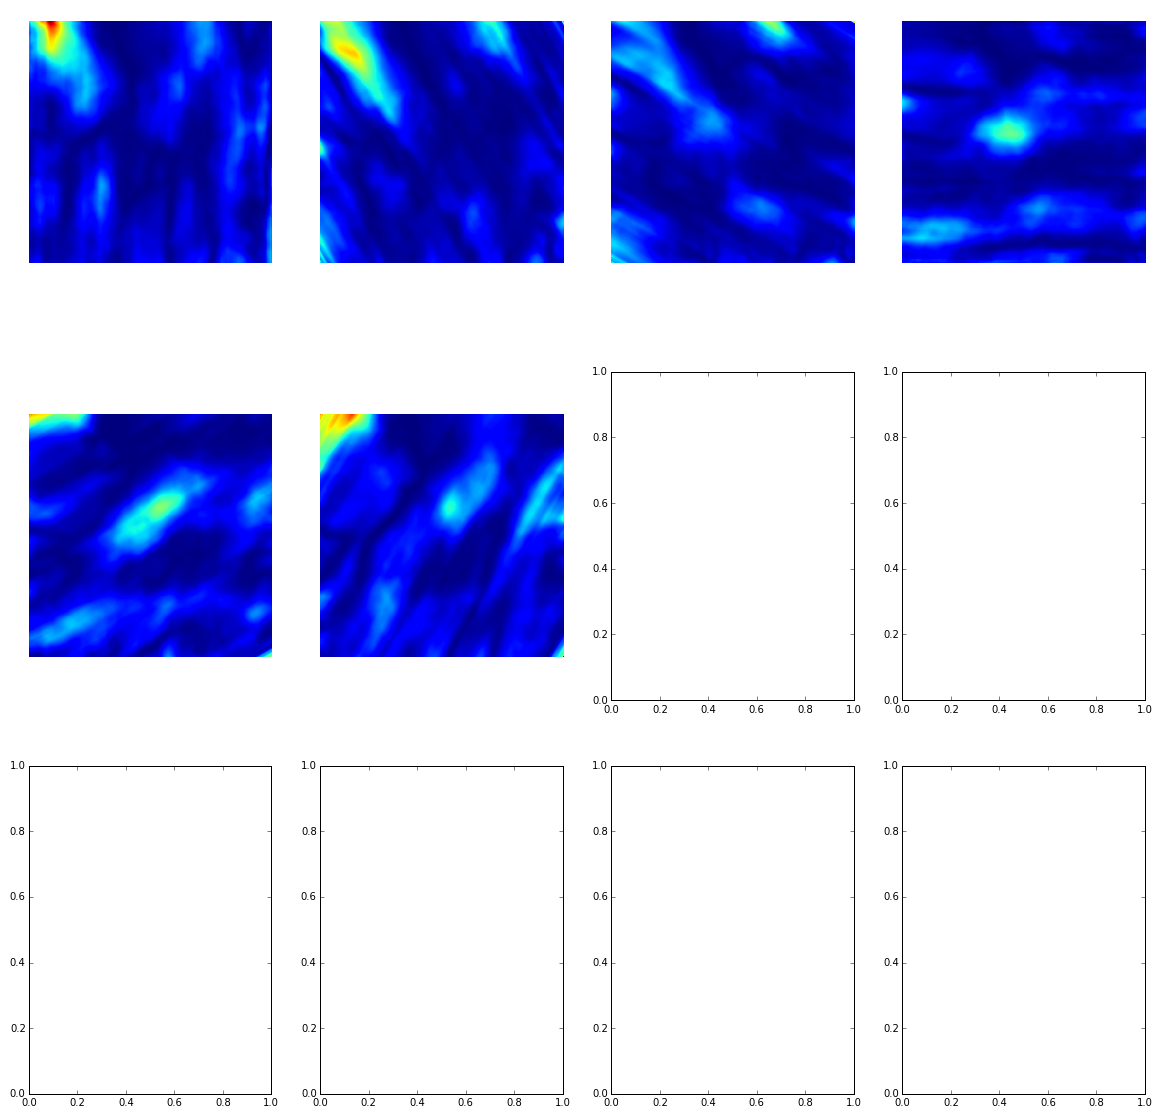

In [364]:
n_rows = 3
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,20));
for s in range(n_theta/2):
    ax = axes[s/n_cols, s%n_cols]
    
#     G[s]
    
#     viz[zip(*new_indices_shift_right_s[2,382])] = [255,0,0]
#     viz[zip(*new_indices_shift_left_s[2,383])] = [255,255,255]
    
    ax.matshow(G[s], vmin=0, vmax=vmax);
    ax.set_axis_off();